In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split


from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.models import model_from_json

In [2]:
print(os.listdir('../own_dataset/1d6_zoom/train'))

['5', '1', '4', '3', '6', '2']


In [3]:
train_path= ('../own_dataset/1d6_zoom/train')
test_path= ('../own_dataset/1d6_zoom/test')

In [4]:
batch_size_train=30  #,batch_size= batch_size_train
batch_size_valid=30
targetsize= 150
datagen=ImageDataGenerator(rotation_range=360,brightness_range=[0.7,1.2],height_shift_range=0.1
                           ,width_shift_range=0.1,zoom_range=[0.7,1.1])
train_batches= datagen.flow_from_directory(train_path, target_size=(targetsize,targetsize), 
                                           classes=os.listdir('../own_dataset/1d6_zoom/train'),
                                           batch_size= batch_size_train)
test_batches= datagen.flow_from_directory(test_path,  target_size=(targetsize,targetsize), 
                                           classes=os.listdir('../own_dataset/1d6_zoom/test'),
                                           batch_size= batch_size_train)

Found 6186 images belonging to 6 classes.
Found 1290 images belonging to 6 classes.


In [5]:
def plots(ims, figsize=(20,10), rows=1, interp= False, titles= None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims= ims.transpose((0,1,2,3))
    f= plt.figure(figsize=figsize)
    cols= len(ims)//rows if len(ims) %2 == 0 else len(ims)//rows + 1
    for i in range(5):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

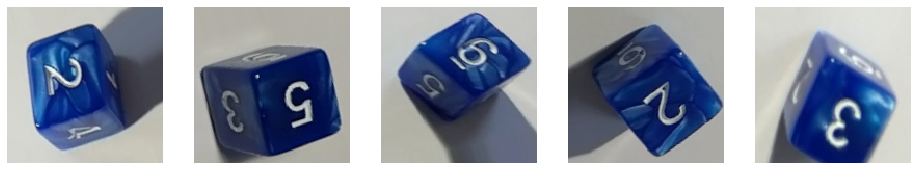

In [6]:
plots(train_batches[1][0],figsize=(100,70))

In [7]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 *0.95**x)

In [8]:
"""

nfilters = [8, 16]
kernel_sizes = [(4,4), (2,2)]


model = Sequential()
# CONV1 (ReLU) > POOL1
model.add(Conv2D(nfilters[0], kernel_sizes[0], # 8 filters, 4x4
                 strides=(1,1),
                 padding='same', 
                 input_shape=(targetsize,targetsize, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(8,8),
                       strides=(8,8),
                       padding='same'))
# CONV2 (ReLU) > POOL2
model.add(Conv2D(nfilters[1], kernel_sizes[1], # 16 filters, 2x2
                 strides=(1,1),
                 padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4),
                       strides=(4,4),
                       padding='same'))

# Fully connected layer with softmax
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.summary()
"""

"\n\nnfilters = [8, 16]\nkernel_sizes = [(4,4), (2,2)]\n\n\nmodel = Sequential()\n# CONV1 (ReLU) > POOL1\nmodel.add(Conv2D(nfilters[0], kernel_sizes[0], # 8 filters, 4x4\n                 strides=(1,1),\n                 padding='same', \n                 input_shape=(targetsize,targetsize, 3),activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(8,8),\n                       strides=(8,8),\n                       padding='same'))\n# CONV2 (ReLU) > POOL2\nmodel.add(Conv2D(nfilters[1], kernel_sizes[1], # 16 filters, 2x2\n                 strides=(1,1),\n                 padding='same',activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(4,4),\n                       strides=(4,4),\n                       padding='same'))\n\n# Fully connected layer with softmax\nmodel.add(Flatten())\nmodel.add(Dense(6, activation='softmax'))\nmodel.summary()\n"

In [9]:

"""
model.compile(Adam(lr=.0002), loss='categorical_crossentropy', metrics= ['accuracy'])
history= model.fit_generator(train_batches, steps_per_epoch= len(train_batches) , callbacks=[reduce_lr],
                             validation_data=train_batches, validation_steps= len(train_batches), 
                             epochs=500)
"""

"\nmodel.compile(Adam(lr=.0002), loss='categorical_crossentropy', metrics= ['accuracy'])\nhistory= model.fit_generator(train_batches, steps_per_epoch= len(train_batches) , callbacks=[reduce_lr],\n                             validation_data=train_batches, validation_steps= len(train_batches), \n                             epochs=500)\n"

In [10]:
#cp_callback=tf.keras.callbacks.ModelCheckpoint(filepath=os.getcwd(),save_weights_only=True,verbose=1)

In [11]:
#model.save('/home/ordovas/IRONHACK/dice-scores-recognition/model_d6_augmented_c1.h5')

In [12]:

model2 = Sequential()
model2.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(targetsize,targetsize, 3)) )
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='SAME', activation='relu'))
model2.add(MaxPooling2D((2, 2)))


model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='SAME', activation='relu'))
model2.add(MaxPooling2D((2, 2)))

#model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='SAME', activation='relu'))
#model2.add(MaxPooling2D((2, 2)))

#model2.add(Conv2D(filters=512, kernel_size=(3,3), padding='SAME', activation='relu'))
#model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(6, activation='softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [13]:
model2.compile(Adam(lr=.0002), loss='categorical_crossentropy', metrics= ['accuracy'])
history2= model2.fit_generator(train_batches, steps_per_epoch= len(train_batches) , 
                             validation_data=test_batches, validation_steps= len(test_batches), 
                             epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
207/207 [==============================] - 194s 939ms/step - loss: 5.7998 - accuracy: 0.2147 - val_loss: 1.7230 - val_accuracy: 0.2643
Epoch 2/50
207/207 [==============================] - 194s 938ms/step - loss: 1.6592 - accuracy: 0.3020 - val_loss: 1.6431 - val_accuracy: 0.3202
Epoch 3/50
207/207 [==============================] - 191s 921ms/step - loss: 1.5847 - accuracy: 0.3427 - val_loss: 1.5360 - val_accuracy: 0.3690
Epoch 4/50
207/207 [==============================] - 190s 917ms/step - loss: 1.5148 - accuracy: 0.3838 - val_loss: 1.5274 - val_accuracy: 0.3589
Epoch 5/50
207/207 [==============================] - 190s 918ms/step - loss: 1.4489 - accuracy: 0.4190 - val_loss: 1.4740 - val_accuracy: 0.3922
Epoch 6/50
207/207 [==============================] - 189s 914ms/step - loss: 1.3813 - accuracy: 0.4489 - val_loss: 1.4333 - val_accuracy: 0.4116
Epoch 7/50
207/207 [============================

KeyboardInterrupt: 

In [ ]:
cp_callback=tf.keras.callbacks.ModelCheckpoint(filepath=os.getcwd(),save_weights_only=True,verbose=1)

In [ ]:
model2.save('model_1d6_zoom2.h5')

In [ ]:
model2_json = model2.to_json()
with open("model_1d6_zoom2.json", "w") as json_file:
    json_file.write(model2_json)

In [ ]:
# https://machinelearningmastery.com/save-load-keras-deep-learning-models/

